In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
%matplotlib inline

In [3]:
df= pd.read_csv('ready_to_model.csv')

In [4]:
df = df.drop(['job_title','senior_role'], axis=1)

In [5]:
df.description[0]

'\r\r\r\r\r\r\r\r\r\nTalenza has been engaged by an Icon Australian brand and ASX Top 50 Organisation to build a technology platform that enables rapid generation, simulation, and analysis of development projects. We are looking for highly-motivated Data Scientist\r\r\r\r\r\r\r\r\r\n          with experience in econometrics and supervised machine learning, and an extensive track record of creating and implementing innovative solutions to complex problems.\r\r\r\r\r\r\r\r\r\nKey role within an industry leading Australian brand looking to innovate the Australian way of life, you will have significant visibility and scope to apply econometrics and machine learning to several technical and functional areas.The Gist Of It..\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\nLead the software system architecture and design to appropriately incorporate statistical analysis into the platform. Effectively communicate solutions to software engineers, customer facing and operational team\r\r\r\r\r\r\r\r\r\nA

In [5]:
df.head(4)

,location,class,job_type,description,pay_type,salary,job_role,pay_rate
0,Sydney,Science & Healthcare,Contract/Temp,\r\r\r\r\r\r\r\r\r\nTalenza has been engaged b...,daily,262500.0,DS,high
1,Sydney,Information & Communication Technology,Full Time,Great team environment/ office space Perman...,annual,154999.5,DS,high
2,Melbourne,Information & Communication Technology,Full Time,Data Scientist | Melbourne CBD | Permanent\r\r...,annual,120000.0,DS,moderate
3,Sydney,Science & Healthcare,Contract/Temp,\r\r\r\r\r\r\r\r\r\nTalenza has been engaged b...,daily,356250.0,SeniorDS,high


### Data Cleaning: description

In [6]:
def char_removal(text):
    text = re.sub(r'\r',' ',text)
    text = re.sub(r'\n',' ', text)
    text = re.sub(r'\xa0',' ', text)
    text = re.sub(r'[\(\)]',' ',text)
    text = re.sub(r'\S+@\S+\.\S+\s?',' ', text)
    text= re.sub(r'(https?:\/\/|www\.|https?:\/\/www\.)(\s)*((\w|\s)+\.)+([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', ' ', text)
    text = re.sub(r'\d+',' ', text)
    text = re.sub(r'([^\x00-\x7F])+',' ',text)
    text = re.sub(r'[^\w\s]',' ',text)
    text = re.sub(r'\s+',' ', text)
    return text

In [7]:
df['description'] = df.description.map(lambda x: char_removal(x))

In [8]:
df.description = df.description.str.lower()

In [11]:
df.description[0]

' talenza has been engaged by an icon australian brand and asx top organisation to build a technology platform that enables rapid generation simulation and analysis of development projects we are looking for highly motivated data scientist with experience in econometrics and supervised machine learning and an extensive track record of creating and implementing innovative solutions to complex problems key role within an industry leading australian brand looking to innovate the australian way of life you will have significant visibility and scope to apply econometrics and machine learning to several technical and functional areas the gist of it lead the software system architecture and design to appropriately incorporate statistical analysis into the platform effectively communicate solutions to software engineers customer facing and operational team actively and collaboratively plan architect design develop test deploy and maintain key software solutions and enhancements related to data

### Train Test split

In [12]:
X= df.description.values

In [13]:
y= df.job_role

In [14]:
#Baseline
y.value_counts()/len(y)*100

dataengineer    24.663677
DA              17.787743
DS              13.751868
consultant      10.313901
SBI              9.267564
SDA              9.118087
BI               7.922272
SeniorDS         7.174888
Name: job_role, dtype: float64

In [15]:
y= df.job_role.values

In [16]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [17]:
stop_words = list(ENGLISH_STOP_WORDS)

new_list = ['company','overviewprofusion','excited','partnered','high','regarded','undertaking','changes','join','performing',
            'working','latest','technologies','development','managed','highly','engaged','collaborative','culture','suit','passionate',
            'technologist','travel','set','power','account','confident','hand','digit','document','bank','recruit','architectute','contact',
            'opportunity','goals','business','writing','key','leads','federal','mathematical','statistical','live','consistent','considerable', 
            'consumable','leads','data','literacy','skills','sharepoint','digestible','messages','literacy','simple','complete','stakeholders','key',
            'new','design','opportunity','information','learning','software','science','technical','solutions','role','team','work','experience', 
            'data','new','design','opportunity','information','learning','software','science','technical','solutions','role','team','work',
            'experience','projects','client','services','management','develop','apply','nanjing','zhongshan','postgraduate','qualifications',
            'intelligent','simulation','showcases','web','chief','architect','locations','office','analystics','located','nsw','qld','tas','wa',
            'perth','opportunities','security','coordinate','teams','accounts','derive','considered','require','required','alongside','environment',
            'apply','ability','new','love','anlytics','analysis','team','role','skill','customer','technical','design','develop','geelong','melbourne',
            'cbd','foxtel','commercial','lockheed','martin','stelarlab','research','fusion',        
]

In [18]:
my_stop_words = stop_words + new_list

In [19]:
len(my_stop_words)

463

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Text Processing

## 1. Count Vectorizer

In [25]:
cv = CountVectorizer(stop_words=my_stop_words, ngram_range=(1,2)).fit(X_train)

In [26]:
len(cv.get_feature_names())

64055

In [27]:
cv.vocabulary_

{'asx': 4484,
 'leader': 32880,
 'significant': 53129,
 'machine': 34848,
 'artificial': 4047,
 'intelligence': 30491,
 'platform': 42745,
 'enhancements': 20211,
 'overviewthis': 40891,
 'permanent': 42061,
 'agile': 1416,
 'engineering': 19925,
 'practice': 43679,
 'division': 17551,
 'reputable': 49371,
 'technology': 58047,
 'leaders': 32949,
 'excellent': 21349,
 'mentoring': 36751,
 'stakeholder': 54931,
 'formal': 24089,
 'seeking': 52223,
 'long': 34573,
 'term': 58404,
 'stable': 54795,
 'career': 8412,
 'responsibilities': 49964,
 'identify': 27771,
 'oversee': 40866,
 'approaches': 3526,
 'best': 6360,
 'support': 56646,
 'cost': 13156,
 'effective': 18685,
 'maintenance': 35224,
 'growth': 26206,
 'solution': 53623,
 'future': 24748,
 'collaboratively': 10458,
 'partners': 41349,
 'meet': 36519,
 'current': 13907,
 'needs': 38698,
 'ensure': 20288,
 'outputs': 40764,
 'quality': 47096,
 'expectations': 21829,
 'provide': 46368,
 'input': 29919,
 'strategic': 55468,
 'plans'

In [28]:
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

### Predict job title from the description

In [30]:
nb = MultinomialNB()

nb.fit(X_train_cv, y_train)

y_pred = nb.predict(X_test_cv)

In [31]:
nb.score(X_test_cv, y_test)

0.39880952380952384

### Remove stopwords and predict

In [32]:
cv_2 = CountVectorizer(stop_words=my_stop_words)

cv_2.fit(X_train)

X_train_cv2 = cv_2.transform(X_train)

X_test_cv2 = cv_2.transform(X_test)

In [33]:
nb = MultinomialNB()

nb.fit(X_train_cv2, y_train)

y_pred2 = nb.predict(X_test_cv2)

In [34]:
nb.score(X_test_cv2, y_test)

0.47619047619047616

### Include max features along with stop words

In [35]:
cv_3 = CountVectorizer(stop_words=my_stop_words ,max_features=4000, ngram_range=(1, 2), min_df=0.055)

In [36]:
cv_3.fit(X_train)

X_train_cv3 = cv_3.transform(X_train)

X_test_cv3 = cv_3.transform(X_test)

In [37]:
nb = MultinomialNB()

nb.fit(X_train_cv3, y_train)

y_pred3 = nb.predict(X_test_cv3)

In [38]:
nb.score(X_test_cv3, y_test)

0.5773809523809523

In [73]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          BI       0.38      0.50      0.43        10
          DA       0.68      0.56      0.61        27
          DS       0.50      0.67      0.57        24
         SBI       0.53      0.47      0.50        19
         SDA       0.50      0.24      0.32        17
    SeniorDS       0.47      0.44      0.46        18
  consultant       0.57      0.47      0.52        17
dataengineer       0.71      0.89      0.79        36

   micro avg       0.58      0.58      0.58       168
   macro avg       0.54      0.53      0.53       168
weighted avg       0.57      0.58      0.57       168



### Text blob

In [39]:
def lemm_text(text):
    text_blob = TextBlob(text)
    lemmetized_text = [word.lemmatize() for word in text_blob.words]
    return lemmetized_text

In [40]:
cv_4= CountVectorizer(stop_words=stop_words,
                     max_features=4000, 
                     min_df=0.055,
                     ngram_range=(1,2), 
                    analyzer=lemm_text)

In [41]:
cv_4.fit_transform(X_train)

X_train_cv4 = cv_4.transform(X_train)

X_test_cv4 = cv_4.transform(X_test)

In [42]:
nb = MultinomialNB()

nb.fit(X_train_cv4, y_train)

y_pred4 = nb.predict(X_test_cv4)

In [43]:
nb.score(X_test_cv4, y_test)

0.5357142857142857

In [74]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

          BI       0.36      0.50      0.42        10
          DA       0.67      0.52      0.58        27
          DS       0.49      0.71      0.58        24
         SBI       0.45      0.26      0.33        19
         SDA       0.43      0.18      0.25        17
    SeniorDS       0.43      0.33      0.38        18
  consultant       0.43      0.53      0.47        17
dataengineer       0.69      0.86      0.77        36

   micro avg       0.54      0.54      0.54       168
   macro avg       0.49      0.49      0.47       168
weighted avg       0.53      0.54      0.52       168



## Another Model - Logistic

In [68]:
lr = LogisticRegression()
cross_val_score(lr, X_train_cv4, y_train, cv=5)
lr.fit(X_train_cv4, y_train)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
p = lr.predict(X_test_cv4)

In [70]:
lr.score(X_test_cv4, y_test)

0.5178571428571429

In [ ]:
lr.

In [72]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

          BI       0.33      0.20      0.25        10
          DA       0.47      0.70      0.57        27
          DS       0.53      0.71      0.61        24
         SBI       0.60      0.32      0.41        19
         SDA       0.23      0.18      0.20        17
    SeniorDS       0.56      0.28      0.37        18
  consultant       0.45      0.29      0.36        17
dataengineer       0.64      0.83      0.72        36

   micro avg       0.52      0.52      0.52       168
   macro avg       0.48      0.44      0.44       168
weighted avg       0.51      0.52      0.49       168



## 2.0 TFIDF

In [80]:
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='n')

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        #print(token)
        if token not in stop_words and len(token) > 3:
            result.append(lemmatize(token))       
    return result

In [81]:
tfidf=TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1,2),min_df=0.1,max_df=1000)

In [82]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1000, max_features=None, min_df=0.1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['take', 'down', 'could', 'still', 'sincere', 'often', 'afterwards', 'never', 'fire', 'seem', 'name', 'you', 'becomes', 'any', 'full', 'may', 'that', 'therein', 'whereafter', 'they', 'another', 'all', 'ie', 'yet', 'yours', 'ourselves', 'well', 'however', 'ever', 'cant', 'and', 'become', '...'melbourne', 'cbd', 'foxtel', 'commercial', 'lockheed', 'martin', 'stelarlab', 'research', 'fusion'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [83]:
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

In [84]:
nb = MultinomialNB()

nb.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb.predict(X_test_tfidf)

In [85]:
nb.score(X_test_tfidf, y_test)

0.48214285714285715

In [86]:
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

          BI       1.00      0.30      0.46        10
          DA       0.45      0.74      0.56        27
          DS       0.40      0.50      0.44        24
         SBI       0.60      0.16      0.25        19
         SDA       1.00      0.12      0.21        17
    SeniorDS       0.00      0.00      0.00        18
  consultant       0.75      0.35      0.48        17
dataengineer       0.46      0.97      0.62        36

   micro avg       0.48      0.48      0.48       168
   macro avg       0.58      0.39      0.38       168
weighted avg       0.53      0.48      0.41       168



C:\Users\anita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
lr = LogisticRegression()
cross_val_score(lr, X_train_tfidf, y_train, cv=5)
lr.fit(X_train_tfidf, y_train)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
y_pred_lr = lr.predict(X_train_tfidf)

In [91]:
lr.score(X_test_tfidf, y_test)

0.5178571428571429

## Unsupervised - LDA

In [96]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn

In [97]:
tfidf=TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1,2), analyzer=lemm_text)

In [98]:
tfidf.fit(X_train)
X_tfidf = tfidf.fit_transform(X)

In [99]:
X_train_tfidf = tfidf.transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

In [100]:
lda_tfidf=LatentDirichletAllocation(n_topics=8,random_state=42)
lda_tfidf.fit(X_tfidf)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=8, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [103]:
lda_tfidf.fit(X_train_cv3)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=8, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [104]:
lda_to_display = pyLDAvis.sklearn.prepare(lda_tfidf,X_train_cv3,cv_3, mds='tsne')

C:\Users\anita\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [105]:
pyLDAvis.display(lda_to_display)

## Supervised Feature Selection

In [54]:
from sklearn.feature_extraction import text
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [55]:
forest= ExtraTreesClassifier(random_state=12)
forest.fit(X_train_tfidf,y_train)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

In [56]:
y_pred= forest.predict(X_test_tfidf)

In [57]:
forest.score(X_test_tfidf, y_test)

0.375

In [58]:
cv_df = pd.DataFrame(X_train_tfidf, 
                    columns=tfidf.get_feature_names(),
                    index=['BI','DA','DS','SBI','SDA','SeniorDS',
                          'consultant','dataengineer'])

feat_array = np.array(tfidf.get_feature_names())
sort_feat = np.argsort(X_train_tfidf.toarray()).flatten()[::-1]

C:\Users\anita\Anaconda3\lib\site-packages\pandas\core\frame.py:406: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  elif isinstance(data, collections.Iterator):


In [64]:
n=50
top_n = feat_array[sort_feat][:50]

In [86]:
top_n

array(['indepth', 'indepth azure', 'adelaide candidate', 'hi jobseekers',
       'integration time', 'paas iot', 'jd azure', 'candidate indepth',
       'big integration', 'jobseekers jd', 'time thank', 'big scientist',
       'iot analytics', 'azure big', 'scientist adelaide', 'jobseekers',
       'azure paas', 'hi', 'jd', 'azure', 'analytics big', 'paas', 'big',
       'thank', 'adelaide', 'iot', 'scientist', 'integration',
       'candidate', 'time', 'analytics', 'excellent etl',
       'excel advanced', 'excellent analytical', 'excel based',
       'excellent amazing', 'excellent', 'excel bi', 'excellenceecu wgea',
       'excellenceecu', 'excellence whilst', 'excellence welcomes',
       'excellence transformation', 'excel building',
       'excellence teaching', 'excellence sydney', 'excellence supply',
       'excellence safety', 'excellence roles', 'excellence research',
       'excellence regarding', 'exceeding expectations',
       'excellence recruitment', 'excellence quota'

In [59]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = X_train_tfidf[grp_ids].toarray()
    else:
        D = X_train_tfidf.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [60]:
top_mean_feats(X_train_tfidf, tfidf.get_feature_names(), grp_ids=None, min_tfidf = 0.1, top_n= 25)

NameError: name 'top_tfidf_feats' is not defined

In [61]:
def top_feats_by_class(X_train_tfidf, y_train, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y_train)
    for label in labels:
        ids = np.where(y_train==label)
        feats_df = top_mean_feats(X_train_tfidf,features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [62]:
feature_list=top_feats_by_class(X_train_tfidf, y_train, tfidf.get_feature_names(), min_tfidf=0.1, top_n=25)

NameError: name 'top_tfidf_feats' is not defined

In [63]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(30, 15), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=14, fontsize=12)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust((bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=2)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-63-d128fa48ba74>, line 19)

In [64]:
plot_tfidf_classfeats_h(feature_list)

NameError: name 'plot_tfidf_classfeats_h' is not defined

In [117]:
df

,location,class,job_type,description,pay_type,salary,job_role,pay_rate
0,Sydney,Science & Healthcare,Contract/Temp,talenza has been engaged by an icon australia...,daily,262500.000000,DS,high
1,Sydney,Information & Communication Technology,Full Time,great team environment office space permanent...,annual,154999.500000,DS,high
2,Melbourne,Information & Communication Technology,Full Time,data scientist melbourne cbd permanent excitin...,annual,120000.000000,DS,moderate
3,Sydney,Science & Healthcare,Contract/Temp,talenza has been engaged by industry leading ...,daily,356250.000000,SeniorDS,high
4,Sydney,Information & Communication Technology,Contract/Temp,hands on experience with common econometric a...,annual,195227.000000,DS,high
5,Sydney,Information & Communication Technology,Full Time,data scientist customer analytics fintech opp...,annual,165000.000000,DS,high
6,Melbourne,Information & Communication Technology,Contract/Temp,in this exciting contract opportunity we are l...,daily,300000.000000,SeniorDS,high
7,Sydney,Information & Communication Technology,Full Time,about the business and the role my client is a...,annual,120000.000000,DS,moderate
8,Sydney,Information & Communication Technology,Full Time,full time position newcastle office location ...,annual,120000.000000,DS,moderate
9,Sydney,Information & Communication Technology,Full Time,at foxtel we re bringing television to austral...,annual,120000.000000,DS,moderate


In [96]:

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

    
nmf = NMF(n_components=8, random_state=1,
          alpha=.1, l1_ratio=.5).fit(X_tfidf)


print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf.get_feature_names()
print_top_words(nmf, tfidf_feature_names, 20)



Topics in NMF model (Frobenius norm):
Topic #0: and to the a of in with for business will experience you be is on data team or this role
Topic #1: bi microsoft ssis sql ssrs azure ssa server power etl data intelligence database design experience warehouse business report cube using
Topic #2: data science scientist big analytics azure experience model python predictive learning technique insight aws spark statistical a commercial sql r
Topic #3: marketing analytics digital insight customer campaign google adobe modelling a unica medium etc insurance bigquery client attribution driven analysis model
Topic #4: panda account sa message sharepoint digestible to literacy intelligence report simple division consumable key business complete lead high contract manager
Topic #5: lockheed martin stelarlab research fusion and laboratory d processing image defence employment signal in geospatial sensor information r multi tracking
Topic #6: software test testing assurance module gi and quality pla

In [88]:
from wordcloud import WordCloud

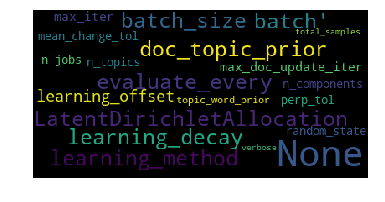

In [105]:
wordcloud = WordCloud().generate(str(lda_tfidf))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()